## 1.定义标准化方法

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


def feature_scalling(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

## 2.载入数据

In [3]:
def load_data():
    data = fetch_california_housing()
    X = data.data  # [20640, 8]
    y = data.target.reshape(-1, 1)
    X = feature_scalling(X)
    return X, y

## 3.定义预测函数及评价函数

In [4]:
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)


def prediction(X, W, bias):
    return np.matmul(X, W) + bias  # [m,n] @ [n,1] = [m,1]


## 4.定义损失函数

In [5]:
def cost_function(X, y, W, bias):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    return 0.5 * (1 / m) * np.sum((y - y_hat) ** 2)

## 5.定义梯度下降

In [6]:
def gradient_descent(X, y, W, bias, alpha):
    m, n = X.shape
    y_hat = prediction(X, W, bias)
    grad_w = -(1 / m) * np.matmul(X.T, (y - y_hat))  # [n,m] @ [m,1] = [n,1]
    grad_b = -(1 / m) * np.sum(y - y_hat)  # 求解梯度
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias

## 6. 训练模型

In [7]:
def train(X, y, ite=200):
    m, n = X.shape  # 506,13
    W = np.random.randn(n, 1)
    b = 0.1
    alpha = 0.2
    costs = []
    for i in range(ite):
        J = cost_function(X, y, W, b)
        costs.append(J)
        W, b = gradient_descent(X, y, W, b, alpha)
    y_pre = prediction(X, W, b)
    print("MSE: ", MSE(y, y_pre))
    return costs


def train_by_sklearn(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pre = model.predict(x)
    print("MSE: ", MSE(y, y_pre))

## 7. 运行

MSE:  0.5243209861846072
MSE:  0.5292960851918204


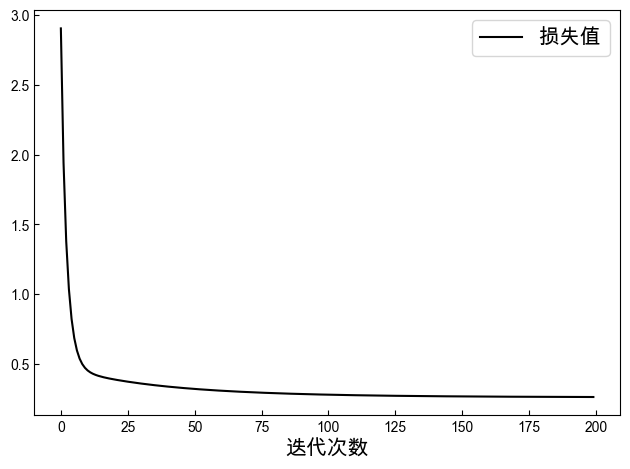

In [8]:
if __name__ == '__main__':
    x, y = load_data()
    train_by_sklearn(x, y)
    costs = train(x, y)
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.plot(range(len(costs)), costs, label='损失值', c='black')
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.legend(fontsize=15)
    plt.xlabel('迭代次数', fontsize=15)
    plt.tight_layout()  # 调整子图间距
    plt.show()
